Exploring and quantifying production downtimes involves a series of steps to collect, organize, and analyze the relevant data. Here's a structured approach to achieve this based on your description

In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

In [2]:

# Data Collection:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
ProductionTank = pd.read_csv(file_path)

In [3]:
ProductionTank.head()

,Unnamed: 0,Material,BATCHID,Tank_1,Instruction_Step,INGRED_ID,INGRED_Name,Quantity,Phase_start,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
0,0,1002150,107643491,2503,S3_BATCH_IN_PROGRESS,NaN,NaN,0.000,09/03/2022 10:42,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,0
1,1,1002150,107643491,2503,STEP1_CONS,1002565,WATER TREATED,5760.000,09/03/2022 10:42,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,0
2,2,1002150,107643491,2503,PLEASE VERIFY BULK ADDITION,NaN,NaN,0.000,09/03/2022 11:16,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,0
3,3,1002150,107643491,2503,STEP1_CONS,1037802,S813 SOD BENZOATE XFX25,5.629,09/03/2022 11:17,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,0
4,4,1002150,107643491,2503,STEP1_CONS,1002818,S651 CITRIC ACID ANH BG XFX25,78.766,09/03/2022 11:27,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,0


In [4]:
ProductionTank.drop(columns=['Unnamed: 0'], inplace=True)


#Data Cleaning:
Address missing values: Decide whether to fill them using an appropriate method (e.g., mean, median, interpolation) or to discard records with missing data.
Address outliers: Use visualizations like box plots to identify outliers and decide on how to handle them.

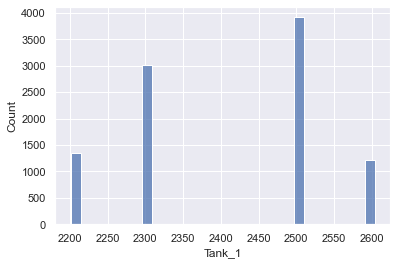

In [5]:
# Using seaborn
sns.set(rc={"figure.figsize":(15, 6)}) #width=10, #height=6
sns.histplot(data=ProductionTank, x='Tank_1', bins=30, kde=False)
plt.show()

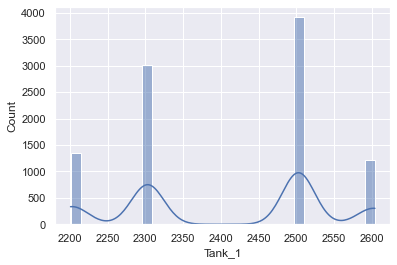

In [6]:
# Using seaborn
sns.histplot(data=ProductionTank, x='Tank_1', bins=30, kde=True)
plt.show()

In [7]:
print(ProductionTank.isnull().sum())

Material                    0
BATCHID                     0
Tank_1                      0
Instruction_Step           25
INGRED_ID                7044
INGRED_Name              7507
Quantity                    0
Phase_start                 0
Phase_end                   0
Phase_duration              0
Phase_start_delay           0
Phase_row_no                0
Flowrate_KGMIN              0
Target_Flowrate          6379
Target_Phase_duration       0
Phase_overrun            2124
Deaeration Phase            0
dtype: int64


In [8]:
#df_cleaned = ProductionTank.fillna(0)

In [9]:
#rint(df_cleaned.isnull().sum())

In [10]:
# = pd.DataFrame(df_cleaned)

# Select only numerical columns
#numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Check for outliers in all numerical columns
#for column in numerical_cols.columns:
   # Q1 = numerical_cols[column].quantile(0.25)
   #Q3 = numerical_cols[column].quantile(0.75)
   # IQR = Q3 - Q1
   # outliers = numerical_cols[(numerical_cols[column] < (Q1 - 1.5 * IQR)) | 
                               #(numerical_cols[column] > (Q3 + 1.5 * IQR))]
    
   # print(f"Outliers in column {column} are:")
   # print(outliers[column])

In [11]:
#import matplotlib.pyplot as plt

# Columns to exclude
#exclude_cols = ['BATCHID', 'Material', 'Unnamed: 0','Quantity', 'Phase_row_no']

# Columns to plot
#cols_to_plot = [col for col in df.columns if col not in exclude_cols]

# Plotting
#df[cols_to_plot].boxplot()
#plt.show()

For each tank, organize the data chronologically to understand the sequence of batches.
This code will first convert the 'Phase_start' column to datetime format so that it can be sorted chronologically. Then it will group the data by the 'Tank' column and sort each group's data by the 'Phase_start' column. The result will be a multi-index dataframe, with the first level being the tank name, and the second level being the original indices of the dataframe.

In [12]:
df = pd.DataFrame(ProductionTank)

# Convert the 'Phase_start' column to datetime format
df['Phase_start'] = pd.to_datetime(df['Phase_start'])

# Group by 'Tank' and then sort each group chronologically by 'Phase_start'
grouped = df.groupby('Tank_1').apply(lambda x: x.sort_values('Phase_overrun'))

print(grouped)

             Material    BATCHID  Tank_1                  Instruction_Step  \
Tank_1                                                                       
2201   2022   1397022  107956670    2201  TAKE A SAMPLE AND SUBMIT FOR QA.   
       7502   1775253  107963676    2201  TAKE A SAMPLE AND SUBMIT FOR QA.   
       7499   1775253  107963676    2201        SAMPLE TO LAB. RESULTS OK?   
       7498   1775253  107963676    2201  TAKE A SAMPLE AND SUBMIT FOR QA.   
       7343   1775253  107899926    2201            S7_RELEASED_TO_FILLING   
...               ...        ...     ...                               ...   
2604   8897   1985101  107759327    2604              S3_BATCH_IN_PROGRESS   
       8937   1985101  107795797    2604           SELECT_DESTINATION_TANK   
       8938   1985101  107795797    2604      S4_BATCH_COMPLETE_QA_PENDING   
       9005   1985101  107956532    2604              S3_BATCH_IN_PROGRESS   
       9059   1985101  108081814    2604              S3_BATCH_I

In [13]:
column_list = grouped.columns.tolist()
print(column_list)

['Material', 'BATCHID', 'Tank_1', 'Instruction_Step', 'INGRED_ID', 'INGRED_Name', 'Quantity', 'Phase_start', 'Phase_end', 'Phase_duration', 'Phase_start_delay', 'Phase_row_no', 'Flowrate_KGMIN', 'Target_Flowrate', 'Target_Phase_duration', 'Phase_overrun', 'Deaeration Phase']


Calculate Downtimes:

For each batch in a tank, calculate the time difference between the end of one process (e.g., mixing) and the start of the next (e.g., deaeration).
Calculate the overall downtime for each batch as the sum of the mixing and deaeration downtimes.
Aggregate these values to get daily, weekly, or monthly downtimes, depending on the granularity of insights you need.

In [25]:
import pandas as pd

df = pd.DataFrame(grouped)

df.reset_index(drop=True, inplace=True)

# Convert Phase_start and Phase_end to datetime
df['Phase_start'] = pd.to_datetime(df['Phase_start'])
df['Phase_end'] = pd.to_datetime(df['Phase_end'])

df_sorted = df.sort_values(by=['Tank_1', 'BATCHID','Phase_overrun','Phase_start'])
df_sorted['Downtime'] = df_sorted.groupby(['Tank_1', 'BATCHID','Phase_overrun'])['Phase_start'].shift(-1) - df_sorted['Phase_end']
# the end of one row and the start of the next row
df_sorted['Downtime'] = df_sorted.groupby(['Tank_1', 'BATCHID','Phase_overrun'])['Phase_start'].shift(-1) - df_sorted['Phase_end']

# Aggregate total downtime for each batch in each tank
total_downtimes = df_sorted.groupby(['Tank_1', 'BATCHID','Phase_overrun'])['Downtime'].sum()

# Calculate daily, weekly, and monthly downtime
#daily_downtimes = df_sorted.set_index('Phase_start').groupby(['Tank_1', 'BATCHID','Phase_overrun']).resample('D')['Downtime'].sum()
#weekly_downtimes = df_sorted.set_index('Phase_start').groupby(['Tank_1', 'BATCHID','Phase_overrun']).resample('W')['Downtime'].sum()
#monthly_downtimes = df_sorted.set_index('Phase_start').groupby(['Tank_1', 'BATCHID','Phase_overrun']).resample('M')['Downtime'].sum()

#print("Total Downtimes:\n", total_downtimes)
#print("\nDaily Downtimes:\n", daily_downtimes)
#print("\nWeekly Downtimes:\n", weekly_downtimes)
#print("\nMonthly Downtimes:\n", monthly_downtimes)


df_sorted['Phase_end'] = pd.to_datetime(df_sorted['Phase_end'])
df_sorted.set_index('Phase_end', inplace=True)
weekly_totals_df = df_sorted.groupby(['Tank_1','Material']).resample('W').sum()['Phase_overrun']
monthly_totals_df = df_sorted.groupby(['Tank_1','Material']).resample('M').sum()['Phase_overrun']
print("\nweekly_totals:\n", weekly_totals_df)
print("\nmonthly_totals:\n", monthly_totals_df)



weekly_totals:
 Tank_1  Material  Phase_end 
2201    1397022   2022-07-17    22.0
                  2022-07-24     0.0
                  2022-07-31     0.0
                  2022-08-07     0.0
                  2022-08-14     0.0
                                ... 
2604    1985101   2023-02-05     0.0
                  2023-02-12     0.0
                  2023-02-19     0.0
                  2023-02-26     0.0
                  2023-03-05     7.0
Name: Phase_overrun, Length: 5598, dtype: float64

monthly_totals:
 Tank_1  Material  Phase_end 
2201    1397022   2022-07-31     22.0
                  2022-08-31      0.0
                  2022-09-30      0.0
                  2022-10-31      0.0
                  2022-11-30      0.0
                                ...  
2604    1985101   2022-10-31     23.0
                  2022-11-30      0.0
                  2022-12-31      8.0
                  2023-01-31    119.0
                  2023-02-28      7.0
Name: Phase_overrun, Length: 144

## Visualisation of the Total Overrun Times for each of the Production Tanks 


In [15]:
#selected_tanks = ["2501", "2502"] - 4 Tonne 

In [26]:
selected_tanks = ["2501", "2502"]  # replace with the names of the tanks you wish to visualize

In [28]:
filtered_weekly_totals = weekly_totals_df[weekly_totals_df.index.get_level_values('Tank_1').isin(selected_tanks)]
filtered_monthly_totals = monthly_totals_df[monthly_totals_df.index.get_level_values('Tank_1').isin(selected_tanks)]

In [29]:
filtered_weekly_totals.unstack(level=0).plot(figsize=(14, 7))
plt.title('Weekly Totals of Phase Overrun Times for Selected Tanks')
plt.xlabel('Week')
plt.ylabel('Total Phase Overrun Time')
plt.grid(True)
plt.legend(title='Tank')
plt.show()

filtered_monthly_totals.unstack(level=0).plot(figsize=(14, 7))
plt.title('Monthly Totals of Phase Overrun Times for Selected Tanks')
plt.xlabel('Month')
plt.ylabel('Total Phase Overrun Time')
plt.grid(True)
plt.legend(title='Tank')
plt.show()





TypeError: no numeric data to plot

In [22]:
selected_tanks2 = ["2503", "2504"]  # replace with the names of the tanks you wish to visualize : 10 tonne

In [23]:
filtered_weekly_totals2 = weekly_totals_df[weekly_totals_df.index.get_level_values('Tank_1').isin(selected_tanks2)]
filtered_monthly_totals2 = monthly_totals_df[monthly_totals_df.index.get_level_values('Tank_1').isin(selected_tanks2)]

In [24]:
filtered_weekly_totals2.unstack(level=0).plot(figsize=(14, 7))
plt.title('Weekly Totals of Phase Overrun Times for Selected Tanks')
plt.xlabel('Week')
plt.ylabel('Total Phase Overrun Time')
plt.grid(True)
plt.legend(title='Tank')
plt.show()

filtered_monthly_totals2.unstack(level=0).plot(figsize=(14, 7))
plt.title('Monthly Totals of Phase Overrun Times for Selected Tanks')
plt.xlabel('Month')
plt.ylabel('Total Phase Overrun Time')
plt.grid(True)
plt.legend(title='Tank')
plt.show()


TypeError: no numeric data to plot

In [ ]:
selected_tanks3 = ["2203", "2204","2202"]  # replace with the names of the tanks you wish to visualize : 20 tonne

In [ ]:
filtered_weekly_totals3 = weekly_totals_df[weekly_totals_df.index.get_level_values('Tank_1').isin(selected_tanks3)]
filtered_monthly_totals3 = monthly_totals_df[monthly_totals_df.index.get_level_values('Tank_1').isin(selected_tanks3)]

In [ ]:
filtered_weekly_totals3.unstack(level=0).plot(figsize=(14, 7))
plt.title('Weekly Totals of Phase Overrun Times for Selected Tanks')
plt.xlabel('Week')
plt.ylabel('Total Phase Overrun Time')
plt.grid(True)
plt.legend(title='Tank')
plt.show()

filtered_monthly_totals3.unstack(level=0).plot(figsize=(14, 7))
plt.title('Monthly Totals of Phase Overrun Times for Selected Tanks')
plt.xlabel('Month')
plt.ylabel('Total Phase Overrun Time')
plt.grid(True)
plt.legend(title='Tank')
plt.show()


In [ ]:
selected_tanks4 = ["2302", "2304","2305"]  # replace with the names of the tanks you wish to visualize : 20 tonne

In [ ]:
filtered_weekly_totals4 = weekly_totals_df[weekly_totals_df.index.get_level_values('Tank_1').isin(selected_tanks4)]
filtered_monthly_totals4 = monthly_totals_df[monthly_totals_df.index.get_level_values('Tank_1').isin(selected_tanks4)]

In [ ]:
filtered_weekly_totals4.unstack(level=0).plot(figsize=(14, 7))
plt.title('Weekly Totals of Phase Overrun Times for Selected Tanks')
plt.xlabel('Week')
plt.ylabel('Total Phase Overrun Time')
plt.grid(True)
plt.legend(title='Tank')
plt.show()

filtered_monthly_totals4.unstack(level=0).plot(figsize=(14, 7))
plt.title('Monthly Totals of Phase Overrun Times for Selected Tanks')
plt.xlabel('Month')
plt.ylabel('Total Phase Overrun Time')
plt.grid(True)
plt.legend(title='Tank')
plt.show()


In [ ]:
selected_tanks5 = ["2601","2602",]  # replace with the names of the tanks you wish to visualize : 20 tonne

In [ ]:
filtered_weekly_totals5 = weekly_totals_df[weekly_totals_df.index.get_level_values('Tank_1').isin(selected_tanks5)]
filtered_monthly_totals5 = monthly_totals_df[monthly_totals_df.index.get_level_values('Tank_1').isin(selected_tanks5)]

In [ ]:
filtered_weekly_totals5.unstack(level=0).plot(figsize=(14, 7))
plt.title('Weekly Totals of Phase Overrun Times for Selected Tanks')
plt.xlabel('Week')
plt.ylabel('Total Phase Overrun Time')
plt.grid(True)
plt.legend(title='Tank')
plt.show()

filtered_monthly_totals5.unstack(level=0).plot(figsize=(14, 7))
plt.title('Monthly Totals of Phase Overrun Times for Selected Tanks')
plt.xlabel('Month')
plt.ylabel('Total Phase Overrun Time')
plt.grid(True)
plt.legend(title='Tank')
plt.show()


Statistical Analysis:

Calculate metrics like mean, median, and standard deviation of downtimes for each tank and overall.
Consider using hypothesis tests (e.g., ANOVA) if you want to determine if downtimes significantly differ across tanks.

In [ ]:
# For weekly totals:
weekly_stats = weekly_totals_df.groupby('Tank_1').agg(['mean', 'median', 'std'])
print("\nWeekly Stats:\n", weekly_stats)

# For monthly totals:
monthly_stats = monthly_totals_df.groupby('Tank_1').agg(['mean', 'median', 'std'])
print("\nMonthly Stats:\n", monthly_stats)

# Overall stats across all tanks:
overall_weekly_stats = weekly_totals_df.agg(['mean', 'median', 'std'])
print("\nOverall Weekly Stats:\n", overall_weekly_stats)

overall_monthly_stats = monthly_totals_df.agg(['mean', 'median', 'std'])
print("\nOverall Monthly Stats:\n", overall_monthly_stats)

In [ ]:
import scipy.stats as stats

# List of unique tanks
unique_tanks = weekly_totals_df.index.get_level_values('Tank_1').unique()

# Preparing data for each tank for ANOVA
data_for_anova = [weekly_totals_df.xs(tank, level='Tank_1').values for tank in unique_tanks]

# Conducting the ANOVA test
f_stat, p_value = stats.f_oneway(*data_for_anova)

print("F-statistic:", f_stat)
print("P-value:", p_value)

# Determine significance
alpha = 0.05  # or whatever your chosen significance level is
if p_value < alpha:
    print("Reject the null hypothesis: Downtimes significantly differ across tanks.")
else:
    print("Fail to reject the null hypothesis: Downtimes do not significantly differ across tanks.")

Identify Patterns and Anomalies:

Look for patterns: Do certain tanks consistently have longer downtimes? Are there specific times of the day or week when downtimes are longer?
Identify anomalies: Are there certain batches that have exceptionally long downtimes compared to others? Try to find reasons by diving deeper into those specific cases.

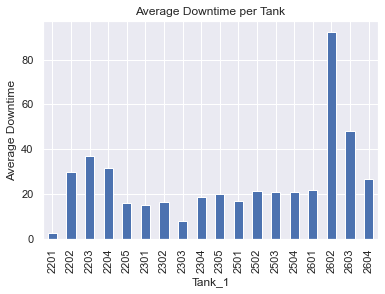

In [30]:
# Getting the mean downtime for each tank
mean_downtime_per_tank = df_sorted.groupby('Tank_1')['Phase_overrun'].mean()

# Plotting
mean_downtime_per_tank.plot(kind='bar', title='Average Downtime per Tank')
plt.ylabel('Average Downtime')
plt.show()

In [ ]:
# Extracting hour and day of week
df_sorted['Hour'] = df_sorted.index.hour
df_sorted['Day_of_Week'] = df_sorted.index.day_name()

# Plotting downtime based on hour of the day
df_sorted.groupby('Hour')['Phase_overrun'].mean().plot(kind='bar', title='Average Downtime by Hour of the Day')
plt.ylabel('Average Downtime')
plt.show()

# Plotting downtime based on day of the week
df_sorted.groupby('Day_of_Week')['Phase_overrun'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', title='Average Downtime by Day of the Week')
plt.ylabel('Average Downtime')
plt.show()

2. Identifying Anomalies:look for values that are a certain number of standard deviations away from the mean.

In [ ]:
# Calculating mean and standard deviation
mean_downtime = df_sorted['Phase_overrun'].mean()
std_downtime = df_sorted['Phase_overrun'].std()

# Identifying anomalies
anomalies = df_sorted[(df_sorted['Phase_overrun'] < mean_downtime - 2*std_downtime) | (df_sorted['Phase_overrun'] > mean_downtime + 2*std_downtime)]

print(anomalies)

In [ ]:
# Sort anomalies by 'Phase_overrun' in descending order to see the longest downtimes
top_anomalies = anomalies.sort_values(by='Phase_overrun', ascending=False).head()
print(top_anomalies)

In [ ]:
Instruction_Step = 'ENSURE GUM IS MIXED IN ?'

# Filter data for the specified ingredient
Instruction_Step = df_sorted[df_sorted['Instruction_Step'] == Instruction_Step]

# Calculating mean and standard deviation for anomalies detection within the filtered data
mean_downtime = Instruction_Step['Phase_overrun'].mean()
std_downtime = Instruction_Step['Phase_overrun'].std()

# Identifying anomalies within the filtered data
anomalies = Instruction_Step[(Instruction_Step['Phase_overrun'] < mean_downtime - 2*std_downtime) | (Instruction_Step['Phase_overrun'] > mean_downtime + 2*std_downtime)]

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(Instruction_Step['Hour'], Instruction_Step['Phase_overrun'], label=f'Batches with ENSURE GUM IS MIXED IN', alpha=0.6)
plt.scatter(anomalies['Hour'], anomalies['Phase_overrun'], color='red', label='Anomalies')
plt.title(f'Downtimes across the Day for Instruction_Step with Anomalies Highlighted')
plt.xlabel('Hour of the Day')
plt.ylabel('Downtime Duration')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Extracting hour from the Phase_end for the x-axis
df_sorted['Hour'] = df_sorted.index.hour

# Calculating mean and standard deviation for anomalies detection
mean_downtime = df_sorted['Phase_overrun'].mean()
std_downtime = df_sorted['Phase_overrun'].std()

# Identifying anomalies
anomalies = df_sorted[(df_sorted['Phase_overrun'] < mean_downtime - 2*std_downtime) | (df_sorted['Phase_overrun'] > mean_downtime + 2*std_downtime)]

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(df_sorted['Hour'], df_sorted['Phase_overrun'], label='All Batches', alpha=0.6)
plt.scatter(anomalies['Hour'], anomalies['Phase_overrun'], color='red', label='Anomalies')
plt.title('Downtimes across the Day with Anomalies Highlighted')
plt.xlabel('Hour of the Day')
plt.ylabel('Downtime Duration')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming df is your dataframe
# Assuming mixing rows have a unique identifier in the 'Instruction_Step' column, let's call it 'MIXING'
# And deaeration rows have a unique identifier, let's call it 'DEAERATION'

# Segregate data
mixing_data = df[df['Instruction_Step'] == 'MIXING']
deaeration_data = df[df['Instruction_Step'] == 'DEAERATION']

# Correlation Analysis
correlation_coefficient = mixing_data['Phase_start_delay'].corr(deaeration_data['Deaeration Phase'])
print("Correlation Coefficient:", correlation_coefficient)

# Regression Analysis
X = mixing_data['Phase_start_delay']
Y = deaeration_data['Deaeration Phase']
X = sm.add_constant(X)  # adding a constant for intercept

model = sm.OLS(Y, X).fit()
print(model.summary())

# Visual Analysis
plt.scatter(mixing_data['Phase_start_delay'], deaeration_data['Deaeration Phase'])
plt.xlabel('Mixing Start Phase Delay')
plt.ylabel('Deaeration Time')
plt.title('Relationship between Mixing Delay and Deaeration Time')
plt.show()

Document Findings:

Summarize the key insights from the analysis.
Identify potential causes for prolonged downtimes, if any. These could be machine inefficiencies, operator errors, supply chain issues, etc.
Provide recommendations for addressing identified inefficiencies.